#**Terminology**#
- i.i.d.: независимые и одинакого распределенные объекты.
- **Likelihood** function: L(θ|X,Y) = P(X,Y|θ). Пояснение: имеем фичи X и лейблы Y. X и Y порождены каким-то распределением с параметром θ и спрашиваем, насколько правдоподобно, что θ = x (x ∈ $\mathbb{R}$). Очевидно, правдоподобие мы хотим максимизировать, чтобы всегда иметь самые "правильные" параметры текущего распределения. В условиях i.i.d. имеем $L(θ|X,Y) = P(X,Y|θ) = ∏\limits_i P(x_i,y_i|θ)$. При этом $logL(θ|X,Y) = \sum\limits_i (logP(x_i,y_i|θ)) → \max\limits_{θ}$
- Модель предсказывает какое-то значение по объекту. Хотим посмотреть, насколько корректно она это делает. Для этого вводится объект Loss Function Q(x, y, f) → $\min\limits_θ$
- Недообучение - понятие, когда модель не смогла выявить зависимости в данных и не может правдиво решать ту или иную задачу (пример: пытаемся приблизить квадратичный многочлен линейной функцией). Переобучение - понятие, когда модель получила слишком много тренировочных данных или училась на них слишком долго, поэтому не может корректно предсказывать что-то на тестовых данных, при этом на тренировочных данных выдает очень хороший результат (пример: приближаем квадратичный многочлен многочленом степени $\geq$ 3.

#**Naive Bayes classifier**#

$\mathbb{L} = \{x_i,y_i\}_{i=1}^n$ - train датасет. $x_i ∈ \mathbb{R}^p$, $y_i ∈ \{C_1, …, C_k\}$ - то есть классификация на k классов.<br>
**Теорема Байеса**<br>
$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$<br>
Мы хотим предсказывать класс объекта, то есть $P(y_i=C_k|x_i)$. Применяем теорему выше и получаем $P(y_i=C_k|x_i) = \frac{P(x_i|y_i=C_k)P(y_i=C_k)}{P(x_i)}$. Второй множитель в числителе мы можем оценить, как частоту появления каждого класса в тренировочном датасете, знаменатель - просуммированный первый множитель из числителя по всем классам. Осталось разобраться с тем, как считать сам первый множитель. И тут мы объясняем название этой модели, а именно делаем наивное предположение о том, что все объекты, а точнее даже фичи независимы между собой. Отсюда получаем следующее $P(x_i|y_i=C_k)=∏\limits_{l=1}^pP(x_i^l|y_i=C_k)$. Для категориальных признаков мы будем считать частоту появления конкретного класса $x_i^l$ и делить на общее число объектов в датасете. Это и будем брать за вероятность. Для числовых признаков мы должны ввести априорное распределение (чаще всего берут просто нормальное) и посчитать его параметры через известные хорошие оценки.<br>
Теперь мы приходим к задаче, которую мы решаем: $C^{*} = arg\max\limits_kP(y_i=C_k|x_i)$. Понятно, что знаменатель в данной задаче мы можем просто убрать, т.к. он не влияет в задаче нахождения максимума.

#**kNN - k Nearest Neighbours**#

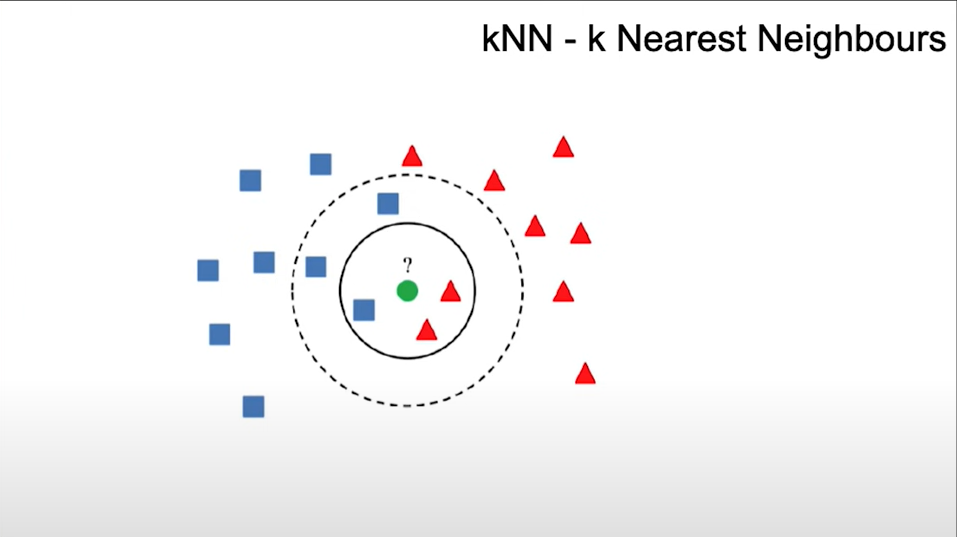

Общая идея в том, чтобы ввести какую-то метрику (расстояние) между объектами и посмотреть на классы k близжайших объектов к тому, класс которого мы не знаем. Так, например, на картинке выше если k = $\overline{1,4}$, то зеленая точка - красный треугольник, а если k = 5, то синий квадрат.

#**Linear Regression**#

**Задача регрессии**<br>
$\mathbb{E}(Y|X)=f(X)$ или же $Y = f(X) + ɛ$, где ɛ - случайный шум, а f(X) - функция регрессии.<br><br>
**Линейная регрессия**<br>
Все очень просто, чтобы из задачи выше получить задачу линейной регрессии нам всего лишь нужно взять линейную функцию f. Тогда получаем $f_w(x) = w_0 + ∑\limits_{i=1}^pw_ix_i = x^Tw$, где $w=(w_0, w_1, …, w_p)^T, x = (1, x_1, …, x_p)^T$, а свободный член в x - bias (смещение). Очевидно, что число p - количество признаков. Составив матрицу из объектов и весов, получаем $f_w(X) = Xw$.<br>
Осталось понять, как обучать матрицу весов. На самом деле все, как и всегда: $Q(X) = ∑\limits_{i=1}^nL(y^i, f_w(x^i))$ → $\min\limits_{w}$, где Q(X) - эмпирический риск, L - функция потерь, а f - линейная функция регрессии. То есть получаем задачу минимизации эмпирического риска.<br><br>
**Решение и регуляризации**<br>
Теперь попробуем найти решение. <br>$Q_{MSE}(X)=∑\limits(y^i-f_w(x^i))^2=||Y-Xw||^2=(Y-Xw)^T(Y-Xw)$ → $\min\limits_{w}$.<br>
$∇_wQ(X)=∇_w(Y^TY - (Xw)^TY - Y^TXw + (Xw)^TXw = 0 - Y^TX - Y^TX + 2X^TXw^T = 0$ ⇒ $w^{*} = (X^TX)^{-1}X^TY$<br>
Но что делать, если $(X^TX)$ - неполного ранга, то есть мы не можем ее обратить? Именно из-за этого чаще всего используется модифицированная формула: $w^{*} = (X^TX + λ^2I)^{-1}X^TY$. Тогда имеем $L_2 = ||Y - Xw||_2^2 + λ^2||w||_2^2$ - **$L_2$ регуляризация** (`Rigde`).<br>
Также есть `Lasso` или же **$L_1$-регуляризация**. Она выглядит так: $L_1 = ||Y - Xw||_2^2 + λ^2||w||_1$. Тут нельзя выписать простое решение, но все еще можем получить правдивую систему: <br>
$\begin{equation*}
\hat{w} =
  \begin{cases}
    (\overline{w_j} - λ)_+ & \overline{w_j} \geq 0\\
    -(|\overline{w_j}| - λ)_+ & \overline{w_j} < 0
  \end{cases}
\end{equation*}$<br>, где $\overline{w_j} = (X^TX)^{-1}X^TY$.

#**Metrics**#

- MSE - Mean Square Error MSE $= (y_t - y_p)^2$
- MAE - Mean Absolute Error MAE $= |y_t - y_p|$
- MAPE - Mean Absolute Percentage Error MAPE $= \frac{1}{n}∑\limits_{i=1}^n|\frac{y_t^i - y_p^i}{y_t^i}|$ - хорошо работает, когда в датасете есть как маленькие значения, так и большие (по факту MAE с нормализацией).
- SMAPE - Symmetric Mean Absolute Percentage Error SMAPE $= \frac{1}{n}∑\limits_{i=1}^n\frac{2 ⋅ |y_t^i - y_p^i|}{|y_t^i| + |y_p^i|}$ - полезно, когда модель шумная. Тут мы нормируемся и на реальные значения и на выход модели.
- R2 - R squared $R^2 = 1 - \frac{∑\limits_{i=1}^n(y_t^i - y_p^i)^2}{∑\limits_{i=1}^n(y_t^i - \overline{y_t})^2}$

#**Linear classifier**#

$\begin{equation*}
c(x) =
  \begin{cases}
    1 & f(x) \geq 0\\
    -1 & f(x) < 0
  \end{cases}
\end{equation*}$<br>
, где f(x) - предсказание линейной модели, которую мы расписали выше. Почему брать 0 за границу - не ошибка? Все просто, у нас всегда есть свободный член (bias, смещение), который и отвечает за сдвиг предсказаний модели. Тут мы расписали самое простое решение проблемы классификации на два класса.<br>
Можно переписать еще проще: $c(x) = sign(f(x)) = sign(x^Tw)$.<br><br>
Далее мы будем более детально рассматривать объект, который называется **margin**. $M_i = y_i ⋅ f(x_i) = y_i ⋅ x_i^Tw$. Его смысл очень прост и объясняется двумя фактами:
- $M_i > 0 ⇔ y_i = c(x_i)$
- $M_i \leq 0 ⇔ y_i \neq c(x_i)$

То есть `margin` больше нуля ⇒ классификация прошла успешна, иначе - нет.<br>
Теперь обсудим функции потерь для задачи классификации в терминологии, построенной нами только что. При этом сведем задачу классификации к задаче регрессии на 2 значения {-1, 1} (из такого допущения, очевидно, следует, что $y_i^2 = 1$. Тогда имеем:<br>
$L_{MSE} = (y_i - x_i^Tw)^2 = \frac{(y_i^2 - y_i ⋅ x_i^Tw)^2}{y_i^2} = (1 - y_i ⋅ x_i^Tw)^2 = (1 - M_i)^2$<br> Также рассмотрим и другие функции потерь на картинке и попробуем понять, в чем проблемы и плюсы некоторых из них.

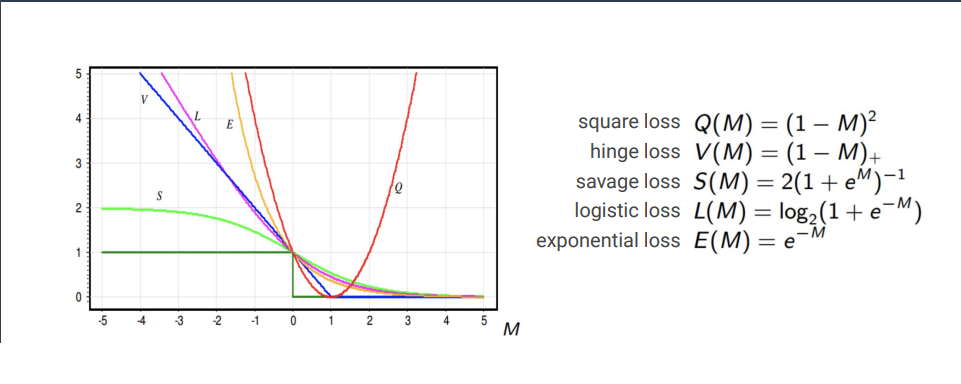

- MSE - модель сильно штрафуется за неправильные ответы - плюс. Но также модель штрафуется за слишком правильные ответы - минус.
- Остальные функции потерь, как мы видим, не штрафуют/слабо штрафуют модель за правильные ответы, но при этом с такой функцией потерь нам нужно будет сделать намного больше шагов, чтобы сойтись к оптимуму (то есть оптимальным параметрам нашей модели для решения конкретной задачи).

#**Logistic Regression**#

Начнем с интуиции, а далее формализуем то, что хотим получить.
Для начала обозначим вероятность предсказать правильную метку, как $p_+$, то есть $p_{+} = P(y = 1|x) ∈ [0, 1]$.<br>
Мы все еще хотим свести задачу классификации к задаче регрессии, но сталкиваемся с проблемой: вероятность ∈ [0, 1], а в регрессии мы рассматриваем всю действительную прямую ($y = x^Tw ∈ \mathbb{R})$. Для этого есть свое решение, а именно применить сигмойду, ведь все мы хорошо знаем, что множество значений сигмойды - [0, 1], а множество определения - $\mathbb{R}$. Проведем все преобразования поэтапно:
- $\frac{p_+}{1 - p_+} ∈ [0, +∞]$
- $log\frac{p_+}{1 - p_+} ∈ \mathbb{R}$

Ну и получаем непосредственно: $\frac{p_+}{1 - p_+} = exp(x^Tw) ⇔ p_+ = \frac{1}{1 + exp(-x^Tw)} = σ(x^Tw)$. На самом деле важно понимать свойства сигмойды и то, как она выглядит, т.к. эта функция используется не только в задаче классификации, но и в качестве функции активации в нейронных сетях. Некоторые полезные свойства:
- $1 - σ(x) = σ(-x)$
- $σ^{'}(x) = σ(x) ⋅ (1 - σ(x))$

Теперь вспоминаем наш разговор о оценки максимального правдоподобия (далее ММП - метод максимального правдоподобия) и получаем такие замечательные выводы:
- $y_i = 1 ⇒ P(x_i, 1|w) = σ_w(x_i) = σ_w(M_i)$
- $y_i = -1 ⇒ P(x_i, -1|w) =1 - σ_w(x_i) = σ_w(-x_i) = σ_w(M_i)$

 Ну и вследствие этого получаем такую формулу: $logL(w|X, Y) = ∑\limits_{i=1}^n logσ_w(M_i) = -∑\limits_{i=1}^n log(1 + exp(-M_i)) → \max\limits_w$

#**Multiclass aggregation strategies**#

1) **Один против всех**<br>
Выбираем один класс, а все остальные помечаем противоположным классом. Так делаем со всеми классами и получаем n классификаторов, где n - число классов. Очевидно, можно подобрать простой контрпример к такой стратегии: один класс заключен между двумя другими.

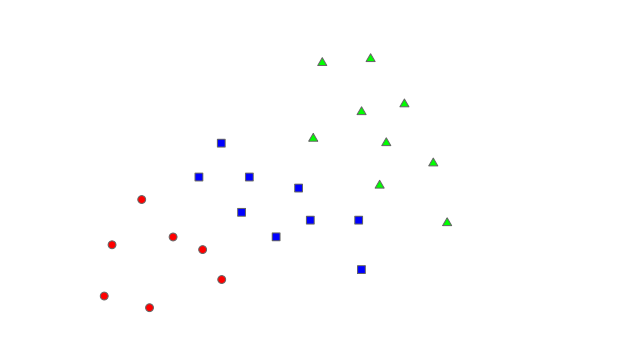

По картинке понятно, что мы не можем отделить синий класс от красного и зеленого, такой классификатор не будет валидным.

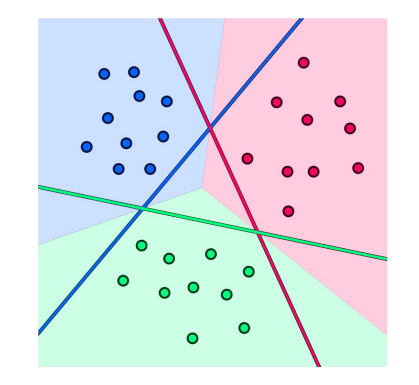

Эта картинка отвечает на вопрос, как делать финальное предсказание. А именно, мы выбираем ту зону, в которую попала очередна наша точка (объект, который нужно классифицировать).<br>
2) **Один против одного**<br>
Суть этой стратегии в том, чтобы сравнить каждый с каждым попарно, при этом отбрасывая все остальные классы.

#**Classification Metrics**#

- Accuracy = $\frac{1}{n}∑\limits_{i=1}^n(y_t^i = y_p^i)$ или же количество правильных ответов / общее количество ответов.
- Balanced accuracy = $\frac{1}{C}∑\limits_{k=1}^C\frac{∑_i (y_t^i = k \ \&\&\  y_t^i = y_p^i)}{∑_i (y_t^i = k)}$. Суть простая, нам важны все классы, но при этом они несбалансированы. В таком случае обычная accuracy может дать хороший результат, если наш классификатор даже константен. Выход: посчитать accuracy в каждом классе и усреднить. На практике сильного буста часто не дает.
- Precision and Recall<br>
Тут нам нужно будет определить еще 4 понятия.
  - True Positive (TP) - классификатор правильно определил положительный класс
  - True Negative (TN) - классификатор ошибся в определении положительного класса
  - False Positive (FP или же ошибка первого рода) - определяется аналогично
  - False Negative (FN или же ошибка второго рода) - определяется аналогично<br>
  Precision = $\frac{TP}{TP + FP}$ или же как много правильных объектов из первого класса мы отметили таковыми.<br>
  Recall = $\frac{TP}{TP + FN}$ или же, как много объектов из тех, что мы отнесли к положительному классу и правда являются таковыми.
- Появляется метрика f1 - среднее геометрическое между Precision и Recall. Эта вещь будет диф-емой, в отличие от того же минимума, поэтому является хорошей в задаче бинарной классификации.<br>
$F_1 = 2 ⋅ \frac{precision ⋅ recall}{precision + recall}$
- $F_β = (1 + β^2)\frac{precision ⋅ recall}{β^2precision + recall}$ - нам Recall важнее, чем Precision. На самом деле, в каком-то смысле Recall охарактеризовывает ошибку второго рода, а Precision - первого. Нередкая ситуация - поставить выше ценность ошибки второго рода, чем первого (то есть лучше сказать человеку, что он болен, чем пропустить больного человека, как здорового).
- ROC (Receiver Operating Characteristic)<br>
$FPR = \frac{FP}{FP +TN}$<br>
$TPR = \frac{TP}{TP + FN} = Recall$<br>
По факту ROC-кривая - график в осях (TPR - OY, FPR - OX). Если говорить более формально, то для каждого объекта мы подсчитываем TP, TN, FP, FN и ставим некоторый treshold - прямая, параллельная оси OY (отсечка) для лучшего понимания. Сортируем объекты и двигаем наш treshold, параллельно считая каждый раз TPR и FPR и получаем искомый график.

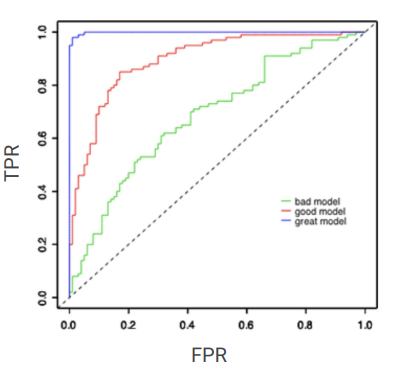

Тут уже становится вполне очевидно, что серая прямая под y = x - рандомный классификатор, а чем выше идет кривая (более точно - чем больше площадь под ней (ROC-AUC)), тем лучше наш классификатор. Также есть простой лайфхак, если кривая идет ниже серой прямой, то стоит просто поменять местами метки. Такое, правда, может произойти только в случае нашей же ошибки (например, мы максимизировали функцию потерь).<br>
- ROC-AUC (ROC Area Under Curve) - площадь под кривой ROC. Из предыдущих рассуждений понятно, что если она меньше 0.5, то мы где-то ошиблись.

#**Bias-variance decomposition**#

Для начала хочется понять интуицию разложения ошибки на bias и variance. Для этого посмотрим на картинку ниже.

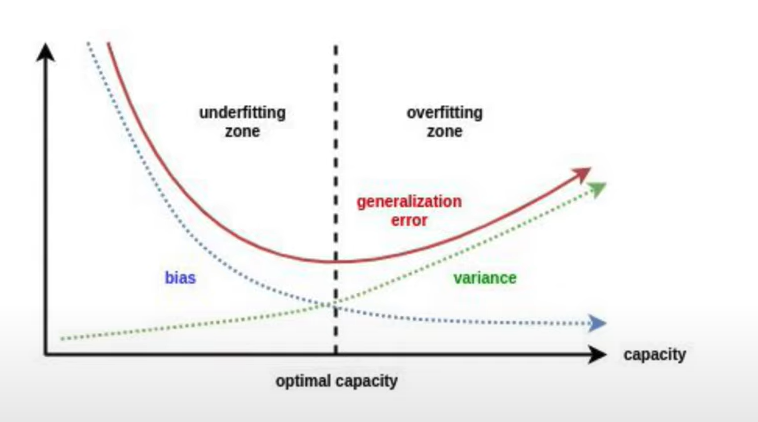

Понимать ее можно так: если мы возьмем слишком простую модель, то она может даже не увидеть простые зависимости в данных и не будет предсказывать ничего хорошего, либо же мы можем взять слишком сложную модель, поэтому она просто запомнит обучающие данные и также ничего хорошего на инференсе не покажет. Тут нужно искать золотую середину. Теперь перейдем к описанию синей и зеленой кривых.
- Bias показывает, насколько наша модель поняла зависимость в данных (например, поняла их распределение). Поэтому, очевидно, что чем сложнее модель, тем меньше будет смещение.
- Variance показывает, насколько сильно поменяются параметры нашей модели (например, веса у линейной модели), если мы возьмем sample из того же распределения.
- Никогда не стоит закрывать глаза на случайные шумы, ведь они тоже всегда неявно входят в составляющие ошибки.

#**Decision tree**#

Классическое дерево - несколько разветвлений глубины h, причем эти разветвления не обязательно должны быть бинарными. То есть мы проходимся по признакам, которые помогают нам как-то отделить один класс от другого и выставляем пороговые значения, так и получается наше дерево. На самом деревья также можно использовать и в задаче регрессии (например, приближение многочлен деревом какой-то глубины).

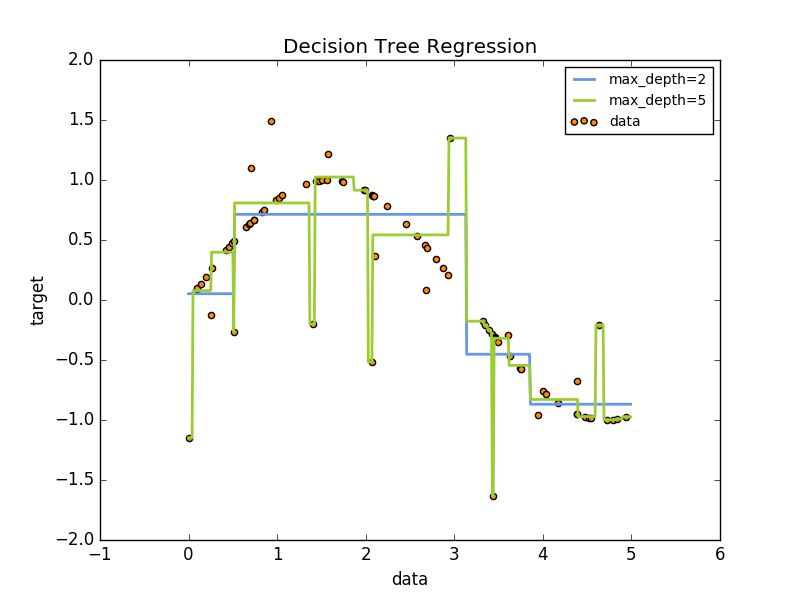

Как же строятся решающие деревья? Все просто, понятно основное правило, которое повторяется рекурсивно. Если $x_j < t$, то такие объекты влево, иначе - вправо. Вопрос в том, как искать этот признак и treshold? Обычно у нас не очень много признаков, treshold-ов же может быть очень много, но все же жадный способ - хорошее решение. То есть мы можем жадно перебрать все признаки и treshold-ы и выбрать лучшее. Но все же хочется какой-то критерий "хорошести" нашего разбиения. Он будет таким: $G(i, t) = \frac{|L|}{|Q|}⋅H(L) + \frac{|R|}{|Q|}⋅H(R)$, где L и R - левая и правая выборка после разделения i-ого признака по treshold t, Q - все объекты до разделения, а H - некоторая функция. Вообще для функции H есть много разновидностей, рассмотрим некоторые из них.<br>
- Misclassification criteria: $H(R) = 1 - \max\limits_k(p_k)$
- Критерий энтропии: $H(R) = -∑\limits_{k=0}^Kp_klogp_k$ - ограничена снизу нулем, а сверху распределением вероятностей, соответствующих равномерному
- Критерий Гини: $H(R) = 1 - ∑\limits_k(p_k)^2$

Теперь хочется понять, что у нас лежит в листах и как мы даем ответ по объекту. Уже очевидно, что в листах мы хотим хранить распределение вероятностей по классам. То есть не просто предсказывать метку класса для объекта, а получать по объекту вектор вероятностей принадлежности каждому из наших классов. На самом деле, решив задачку оптимизации на Negative Log Likelihood, можем понять, что предсказывать нам надо истинные вероятности (то есть посчитать количество элементов k-ого класса в листе и поделить на общее число для получения $p_k$).<br>
Теперь поймем, что делать с задачей регрессии. Опять напишем несколько функций H:
- MSE $H(R) = \min\limits_c \frac{1}{|R|} ∑\limits_{(x_i, y_i) ∈ R} (y_i - c)^2$, где $c^* = \frac{1}{|R|} ∑\limits_{y_i ∈ R}y_i$ - по теореме Гаусса-Маркова.<br>
- Очевидно, что в MAE вместо суммы квадратов будет сумма модулей и предсказывать мы будем уже не среднее, а медиану (константа).

Критерий останова также можно выбрать как душе угодно
- Максимальная глубина
- Минимальное число детей в листьях
- и т.д.

#**Pruning**#

Имеется есть два его вида:
- Pre-pruning: в основном "прореживание" дерева до его построения, то есть все те ограничения, что были описаны чуть выше.
- Post-pruning: "прореживание" дерева после его построения. В основном строим дерево и решаем оптимизационную задачу: как именно отрезать от дерева кусок, чтобы меньше всего потерять в качестве.

#**Some more info**#

**Устойчивость к пропускам**<br>
Легко можно понять, что линейные модели неустойчивы к пропускам, а вот деревья - вполне. В таких случая мы просто отправляем объект и в левое и в правое поддерево, а дальше усредним предсказание с учетом мощности каждого из поддеревьев, то есть $y = \frac{|L|}{|Q|}y_L + \frac{|R|}{|Q|}y_R$, где y - искомое предсказание.<br><br>
На самом деле дерево можно строить и не по бинарным разделениям, тогда мы сможем работать и с категориальными признаками. В наше время именно этот способ в основном и используется в самых популярных библиотеках (CatBoost, LightGBM).

#**Bootstrap**#

Интуиция состоит в том, чтобы набрать из существующего датасета много сэмплов (которые оказывается будут иметь еще и то же распределение) просто путем выбора с повторениями. На каждом из таких сэмплов мы обучаем модель (пусть N раз) и усредняем их всех. Кажется это бессмысленная операция, но на самом деле она уменьшим наше матожидание в N раз.<br>
Пусть $b_j$ - алгоритм, обученный на j-ом бутстрапном сэмпле. Тогда его ошибка выглядит так: $ɛ_j(x) = b_j(x) - y(x)$, $j = \overline{1, N}$. Пусть имеем задачу регрессии и считаем MSE. Тогда $\mathbb{E}_x(b_j(x) - y(x))^2 = \mathbb{E}_xɛ_j^2(x)$. Тогда, если имеем N моделей, то получаем $E = \frac{1}{N}∑\limits_{j=1}^N\mathbb{E}_xɛ_j^2(x)$ - общая ошибка N моделей.<br>
**Тут начинается самое важное**<br>
Пусть $a(x) = \frac{1}{N}∑\limits_{j=1}^Nb_j(x)$ - конечное предсказание по объекту.<br>
Посчитаем его ошибку.<br>
$E_N = \mathbb{E}_x(\frac{1}{N}∑\limits_{j=1}^N b_j(x) - y(x))^2 = \mathbb{E}_x(\frac{1}{N}∑\limits_{j=1}^N ɛ_j(x))^2 = \frac{1}{N}E$ - то есть мы уменьшили нашу ошибку, как и говорилось в самом начале, в целых N раз. При этом мы делаем два очень грубых допущения для этого теоретического вывода, а именно:
- $\mathbb{E}_xɛ_j(x) = 0$
- $\mathbb{E}_xɛ_i(x)ɛ_j(x) = 0$, $i \neq j$

#**Bagging = Bootstrap aggregating**#

Как уже было сказано, мы еще можем (хотя это тоже неправда) предположить, что ошибки у нас несмещенные, но предполагать их нескореллированность совсем плохо. Хочется научиться решать эту проблему, чтобы добиться правдивости этой формулы. Отсюда и появляется алгоритм Bagging. Он утверждает, что если переобучить N деревьев на своих выборках, то они (в силу переобученности) не будут похожи друг на друга, и тогда мы сможем провести рассуждения, описанные выше.

#**RSM - Random Subspace Method**#

Суть этого метода в том, чтобы не давать каждый раз на разделение все признаки, а давать их рандомный сэмпл. В таком случае мы получаем еще больше случайности в разных деревьях. То есть мы приходим к тому, что хочется скрестить идеи Bagging + RSM.

#**Random Forest**#

Идея очень простая, давайте сделаем разные модели (деревья) настолько непохожими друг на друга, насколько возможно, чтобы до максимума уменьшить корелляцию ошибок. Ну тогда объединим Baggin + RSM = Random Forest.<br>
- Одна из очень важных моделей, которую стоит попробовать почти в любой задаче
- Может работать с пропущенными признаками даже более эффективно, чем обычные деревья. Так как тут работает Bagging мы можем специально использовать пропущенные в разных моделях признаки для того, чтобы делать предсказания (смысл в том, что мы еще сильнее вводим случайности между ошибками).
- Можно сделать эту модель еще круче. Например, можно выбирать не подмножество признаков из всех, а просто брать один конкретный, чтобы сделать наши деревья совсем непохожими.
- В Random Forest можно использовать train выборку для оценки качества модели (то есть на этапе валидации). Так мы можем делать банально из-за определения, смысла и свойств Bootstrap.

#**Boosting + Gradient Boosting**#

Интуиция: хотим, чтобы каждая новая модель ансамбля исправляла ошибки предыдущих. Выражаясь более правильно, если мы имеем T - 1 обученную модель со своими весами, то получаем, что функция потерь на T-ом шаге - вес, который зависит от общей ошибки всех предыдущих членов ансамбля на ошибку последнего (того, который сейчас обучается) члена ансамбля.<br><br>
**Градиентный бустинг**<br>
Пусть у нас есть диф-мая функция потерь L(y, f) и есть "оптимальная" с точки зрения нашей функции потерь модель и обучающей выборки:<br>
$\hat{f}(x) = arg \min\limits_{f(x)} L(y, f(x)) = arg \min\limits_{f(x)}\mathbb{E}_{x, y}(L(y, f(x)))$<br>
Также важно сказать, что у нашей модели есть какие-то параметры, которые мы хотим оптимизировать, то есть $\hat{f}(x) = f(x, \hat{θ})$, а также $\hat{θ} = arg \min\limits_{θ} \mathbb{E}_{x, y}[L(y, f(x, θ))]$<br><br>
На каждом шаге считаем, что наша оптимальна момент - взвешенная сумма предыдущих моделей нашего ансамбля, то есть $\hat{f}(x) = ∑\limits_{i=0}^{t-1}\hat{f_i}(x)$.<br>
При этом мы хотим, чтобы новая модель минимизировала ошибку всего предыдущего ансамбля, то есть: $(ρ_t, θ_t) = arg \min\limits_{ρ, θ} \mathbb{E}_{x, y} [L(y, \hat{f}(x) + ρ ⋅ h(x, θ))]$, где второе слагаемое во втором члене пары функции потерь - и есть поправка новой модели. Тогда получается, что $\hat{f_t}(x) = ρ_t ⋅ h(x, θ_t)$<br>
Теперь хотим решать эту задачу оптимизации. На самом деле идея состоит в том, чтобы применить градиентный бустинг в пространстве моделей. А как конкретно это происходит и что это за чудо сейчас рассмотрим.<br>
На самом деле все достаточно просто. Чтобы минимизировать ошибку существующего ансамбля, мы хотим двигаться по антиградиенту функции ошибки, который при этом мы можем легко посчитать для каждого объекта в обучающей выборке в виде $er_i = - [\frac{dL(y_i, f(x_i))}{df(x_i)}]_{f(x) = \hat{f}(x)}$.<br>
Ну и теперь получаем: $θ_t = arg \min\limits_{θ} ∑\limits_{i=1}^n (er_{it} - h(x_i, θ))^2$<br>
Ну и последнее, с чем осталось разобраться - как искать ρ. Тоже очень просто: $ρ_t = arg \min\limits_{ρ} ∑\limits_{i=1}^n L(y_i, \hat{f}(x_i) + ρ ⋅ h(x_i, θ_t))$. В конце останется лишь применить формулу, которую мы писали выше для получения нового ансамбля.<br><br>
**Пару слов**
- Базу индукции (базовую/начанульную модель) можно инициализировать просто константой.
- На самом деле использовать очень глубокие деревья в GB - не самая хорошая идея. Проблема в том, что глубокие деревья очень склонны к переобучению, если дерево переобучено, то у нас очень маленькие градиенты, а зачем нам в таком случае GB и что там делать без градиентов - загадка. Поэтому всегда надо искать золотую середину, которая подходит по сложности к задаче, которая сейчас решается.
- Очевидно, что глупо строить ансамбль только из линейных моделей (например, в задаче регрессии), т.к. наш бустинг (ансамбль) сам по себе является линейной комбинацией (взвешенной суммой моделей), а значит сам по себе является линейной моделью. Получаем, что линейная комбинация линейных моделей - просто более сложная линейная модель. А вот, напрмиер, в логистической регрессии такой фокус получится, т.к. там у нас есть нелинейность, а именно - сигмойда.

#**Stacking and Blending**#

**Blending**<br>
Пусть у нас есть модели из разных параметрических семейств. Хотим как-то из них построить ансамбль. Главная проблема в том, что некоторые модели могут давать скоры лучше, чем другие. То есть хочется учитывать какую-то взвешенную комбинацию весов моделей каждого из типов в новой модели ансамбля. Поделим нашу изначальную выборку на 2 части. На первой будем обучать наши модели всех типов, а на второй брать их взвешенную комбинацию, путем решения аналогичной предыдущему пункту задачи оптимизации. На самом деле в общем случае мы можем не очень удачно поделить изначальный датасет на две выборки, поэтому чаще это делают много раз и усредняют результаты на каждом разделении.<br>
**Stacking**<br>
Не хотим платить данными за построение ансамбля. Поделим изначальную выборку на несколко фолдов. Обучим наш алгоритм на всех фолдах, кроме первого и дадим предсказание для первого (которого еще алгоритм не видел), потом обучим на всех кроме второго, опять дадим предсказание и так далее. В итоге мы получили новые предсказания для всей обучающей выборки. Более того, предсказанные значения (с предварительной регуляризацией) вполне можно использовать, как новые признаки и это действительно неплохо работает в общем случае.